<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Estadísticas descriptivas:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


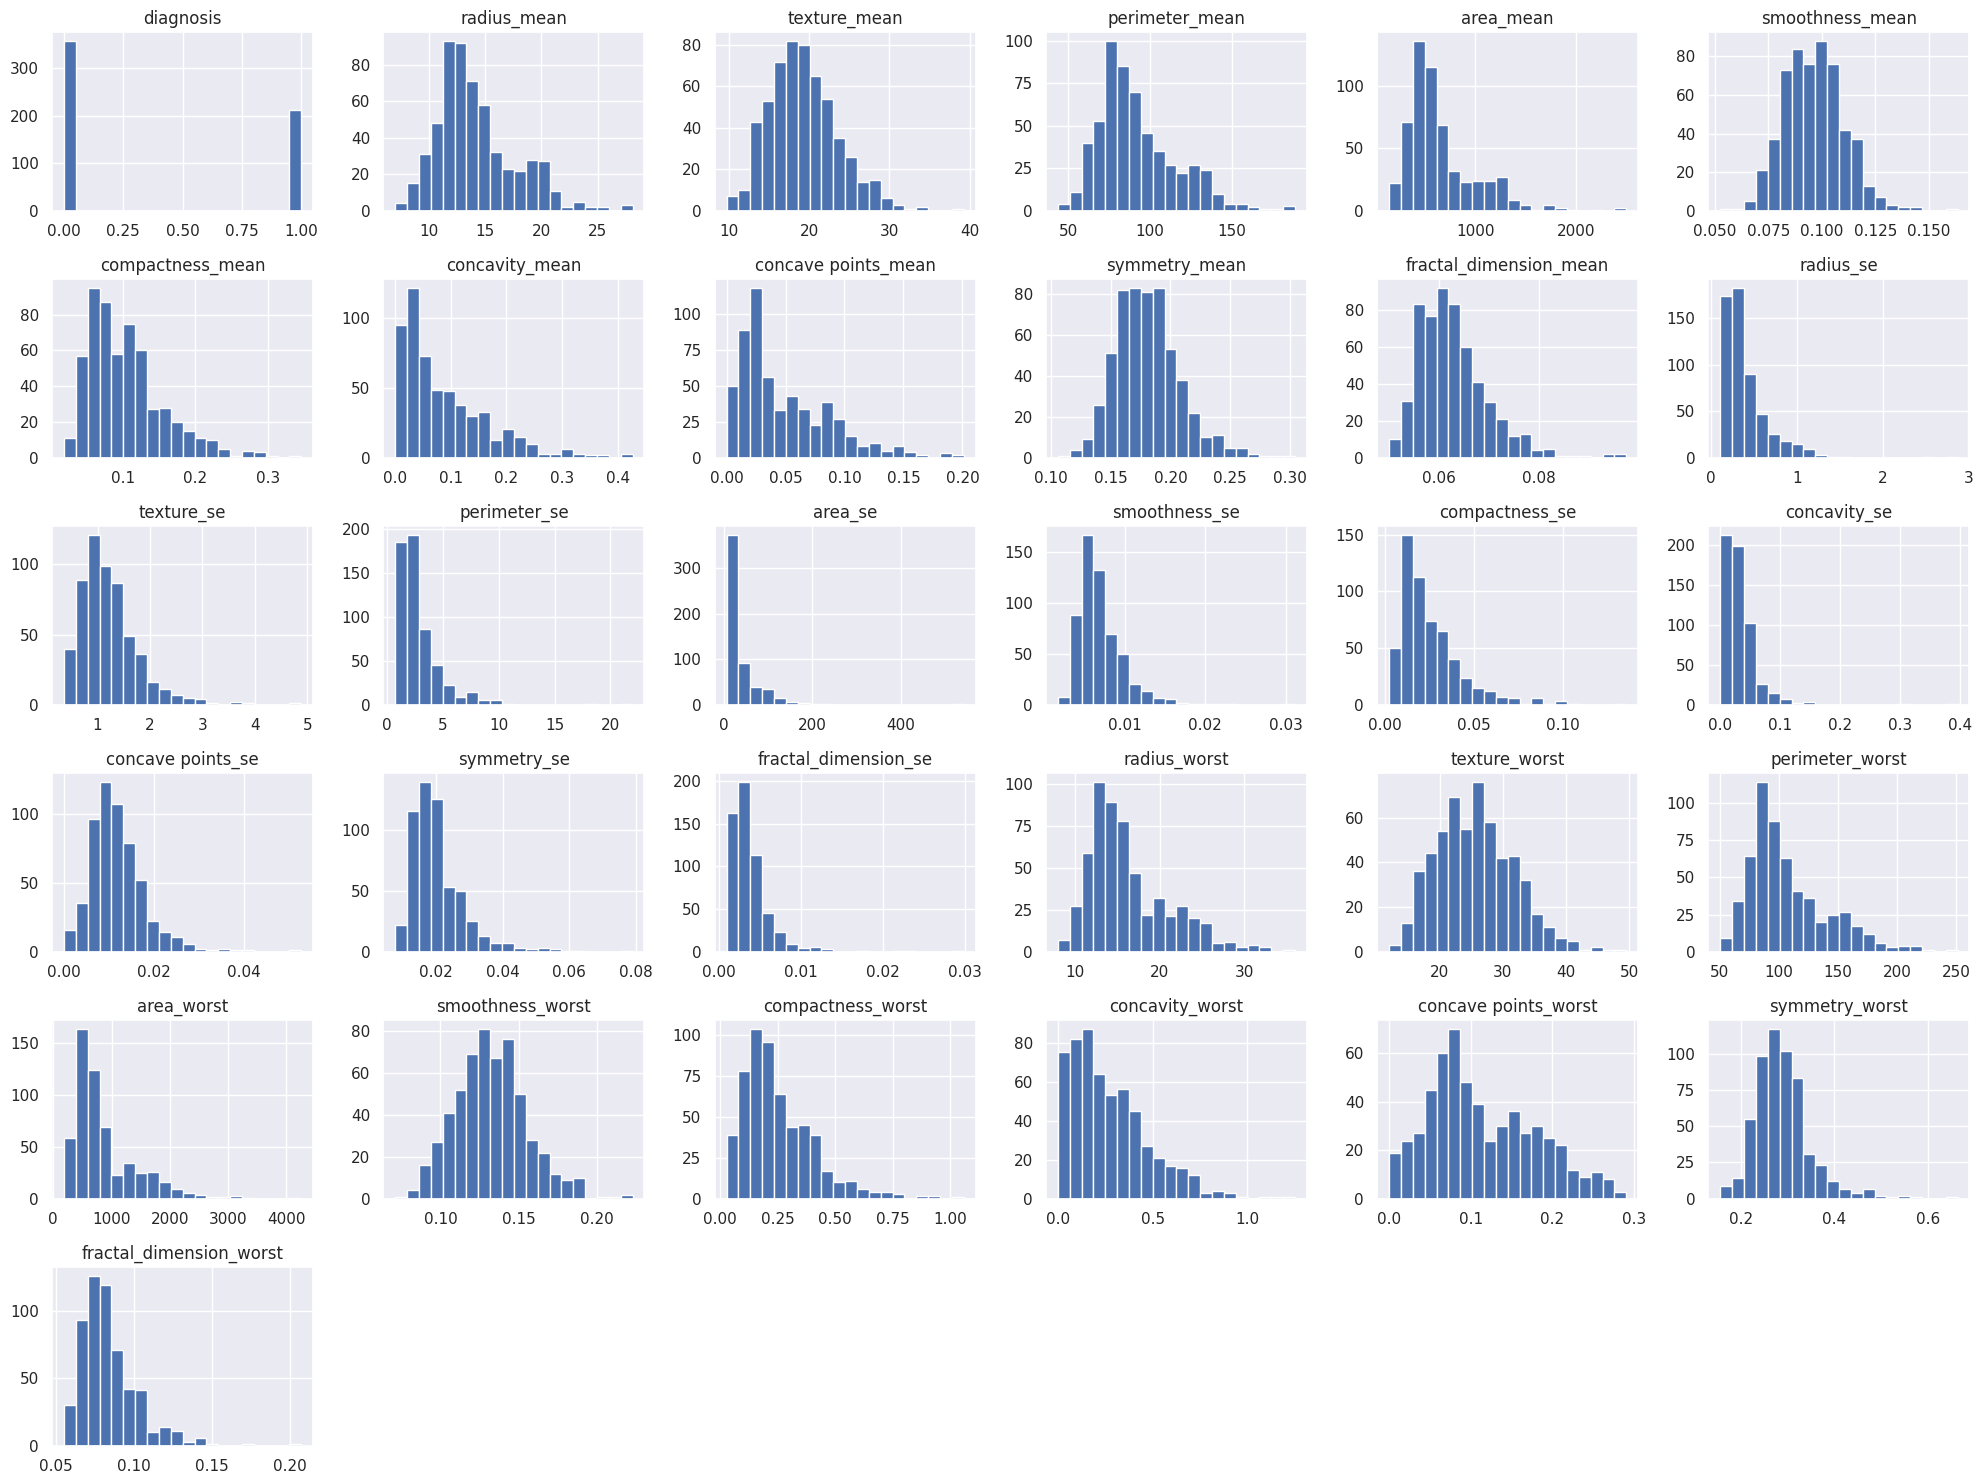

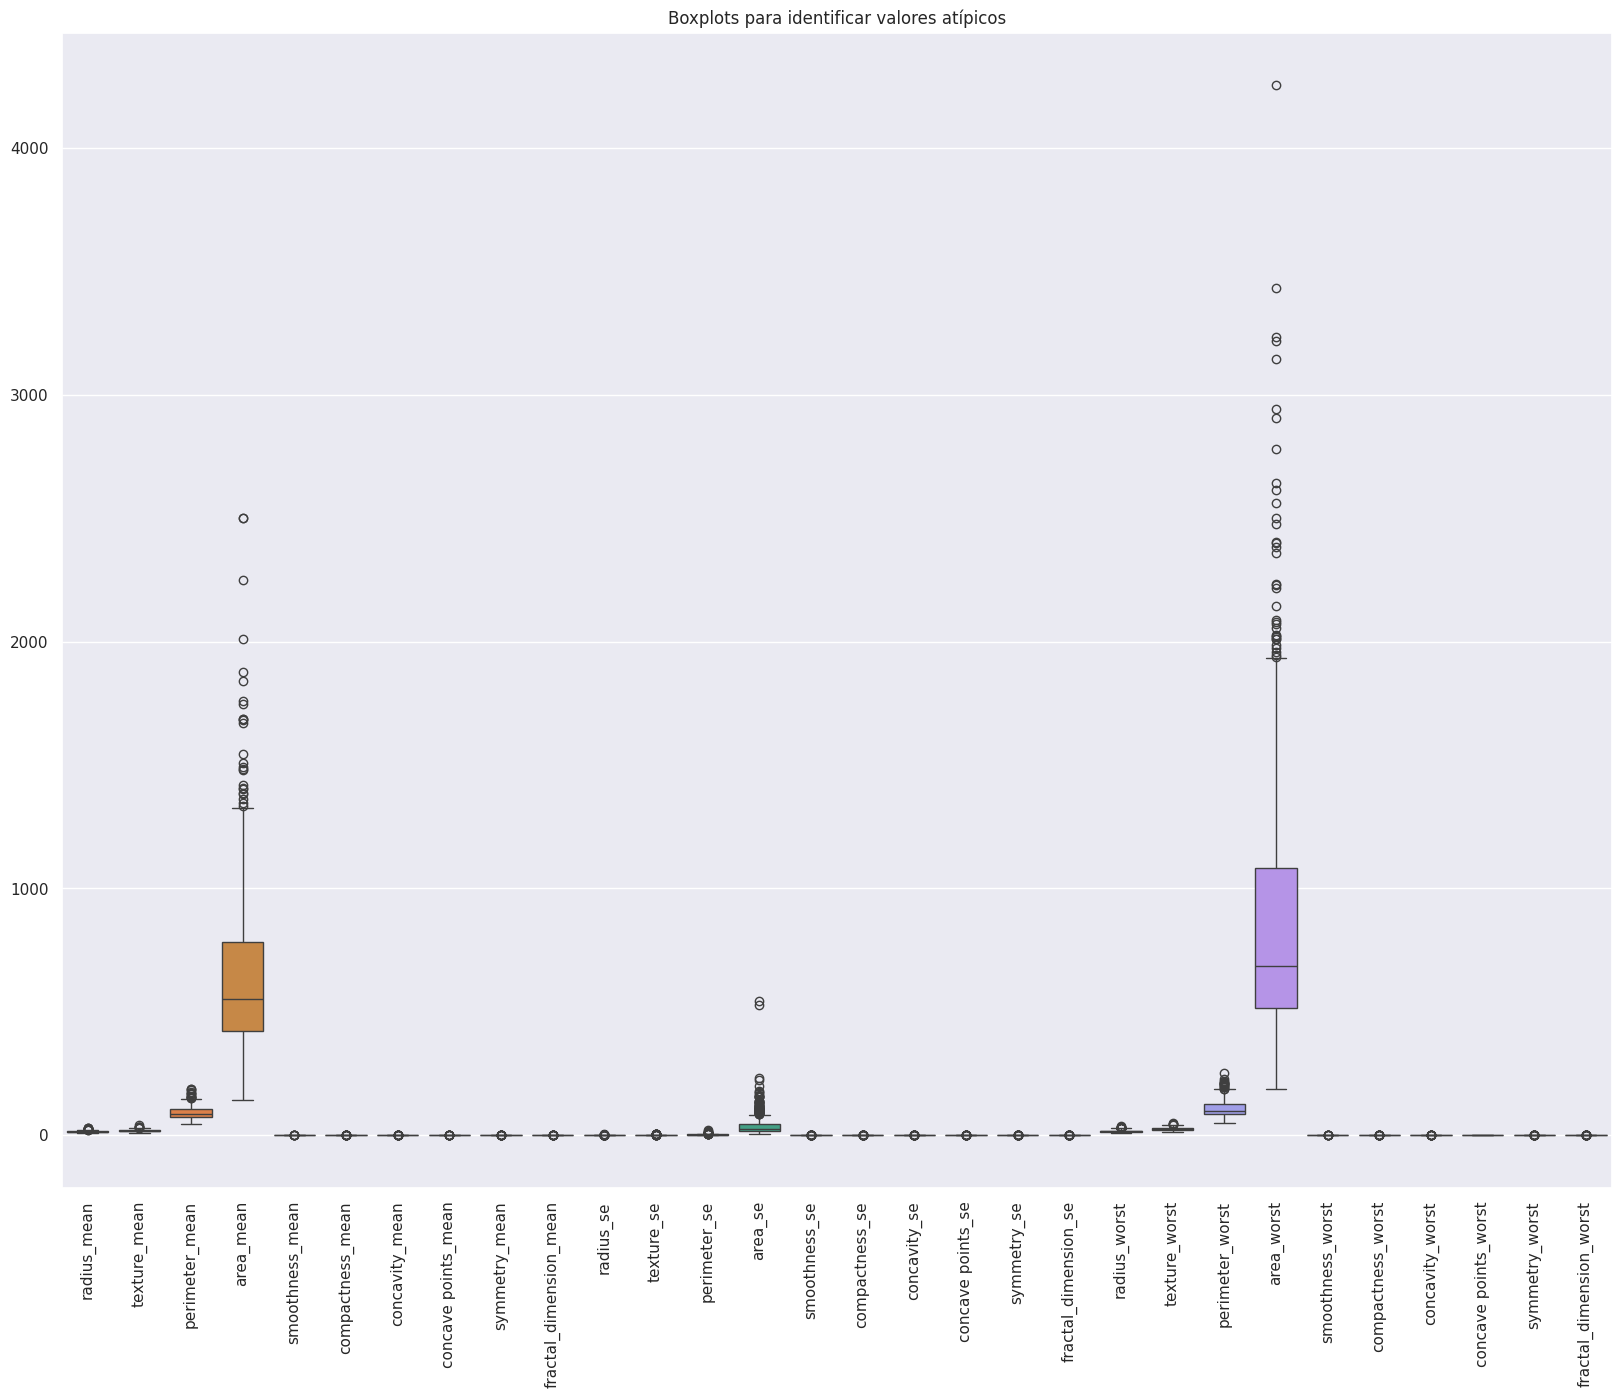


Matriz de correlación:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


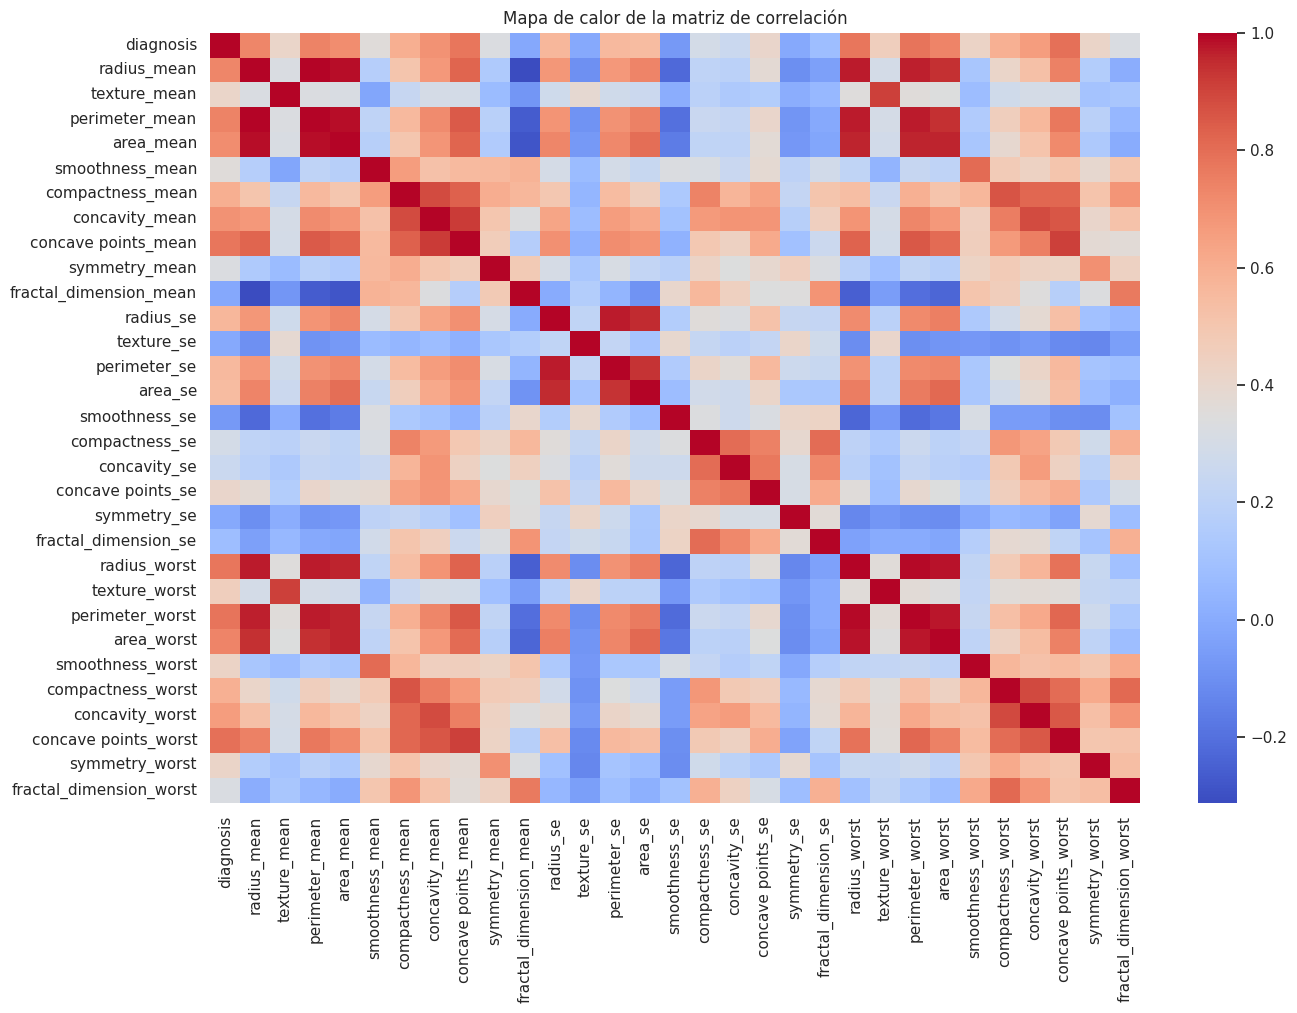

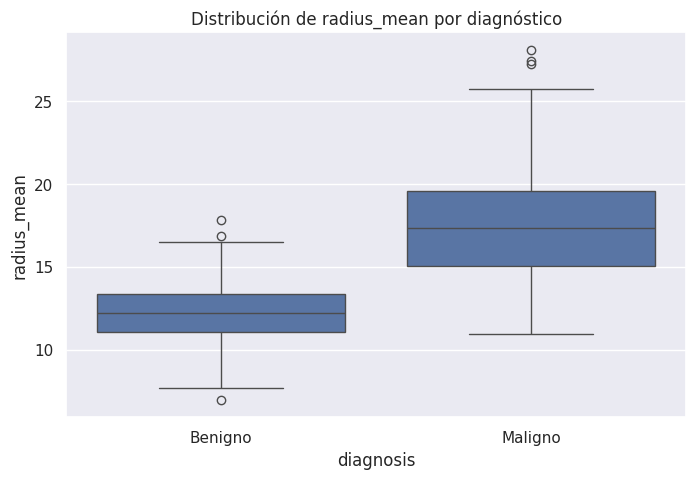

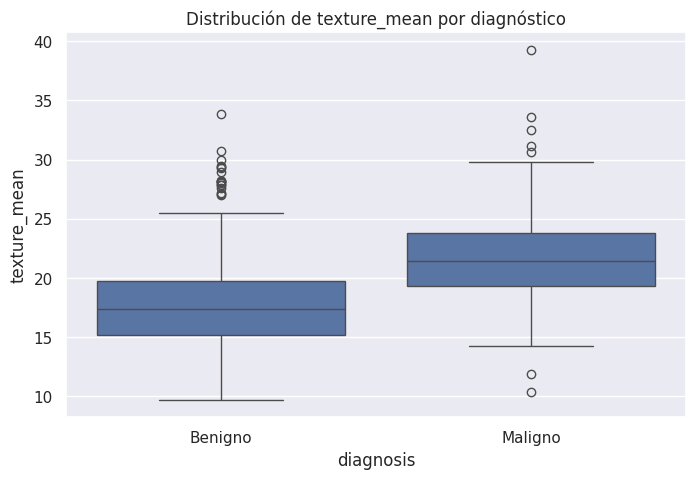

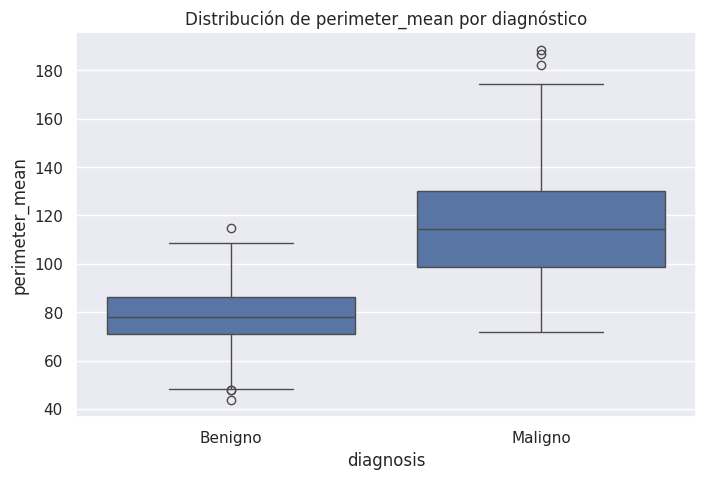

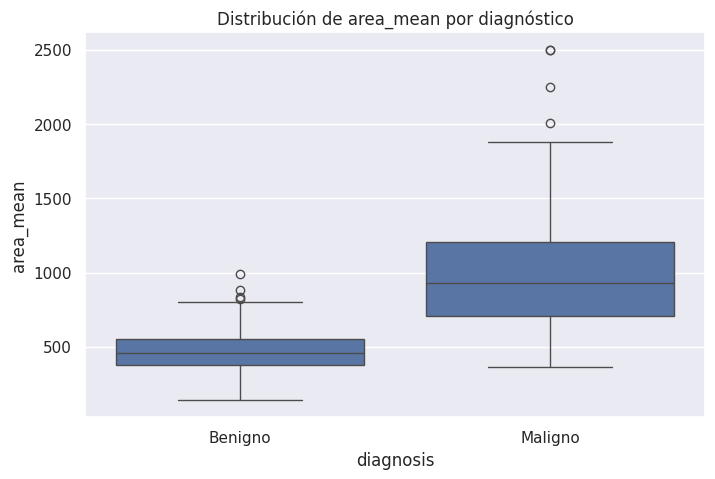

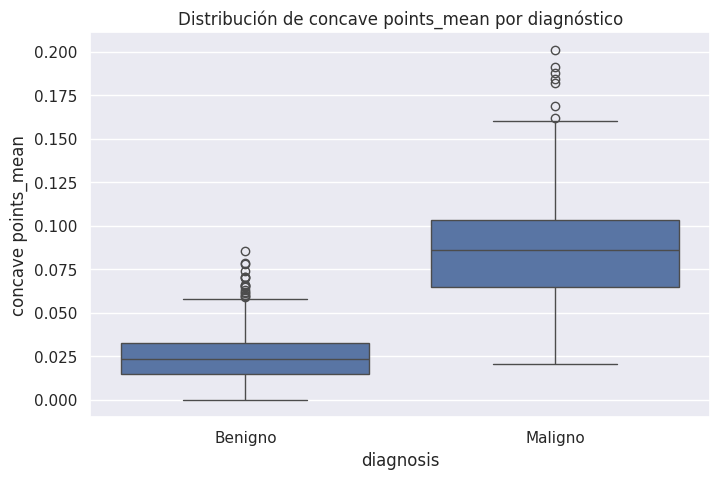


Discusión sobre las variables con mayor capacidad discriminativa:
Observando los boxplots y la matriz de correlación con 'diagnosis',
las variables con mayor diferencia en la distribución entre los grupos
y mayor correlación (positiva o negativa) con 'diagnosis' son las que
parecen tener mayor capacidad discriminativa.
Basado en la EDA, variables como radius_mean, perimeter_mean, area_mean,
concave points_mean, radius_worst, perimeter_worst, area_worst,
concave points_worst, entre otras, muestran diferencias notables
entre tumores benignos y malignos y alta correlación con la variable objetivo.


In [2]:
# Examine la distribución de las variables
print("Estadísticas descriptivas:")
display(df.describe())

# Histograms para visualizar la distribución de cada característica
df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Boxplots para identificar valores atípicos
plt.figure(figsize=(20, 15))
sns.boxplot(data=df.drop('diagnosis', axis=1))
plt.xticks(rotation=90)
plt.title("Boxplots para identificar valores atípicos")
plt.show()


# Analice la correlación entre características
print("\nMatriz de correlación:")
correlation_matrix = df.corr()
display(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

# Visualizar las diferencias más relevantes entre tumores benignos y malignos

# Boxplots para algunas variables clave por diagnóstico
variables_clave = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concave points_mean']

for var in variables_clave:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='diagnosis', y=var, data=df)
    plt.title(f'Distribución de {var} por diagnóstico')
    plt.xticks([0, 1], ['Benigno', 'Maligno'])
    plt.show()

# Discuta qué variables parecen tener mayor capacidad discriminativa.
print("\nDiscusión sobre las variables con mayor capacidad discriminativa:")
print("Observando los boxplots y la matriz de correlación con 'diagnosis',")
print("las variables con mayor diferencia en la distribución entre los grupos")
print("y mayor correlación (positiva o negativa) con 'diagnosis' son las que")
print("parecen tener mayor capacidad discriminativa.")
print("Basado en la EDA, variables como radius_mean, perimeter_mean, area_mean,")
print("concave points_mean, radius_worst, perimeter_worst, area_worst,")
print("concave points_worst, entre otras, muestran diferencias notables")
print("entre tumores benignos y malignos y alta correlación con la variable objetivo.")


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [3]:
# Separar características (X) y variable objetivo (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalizar las variables numéricas utilizando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un DataFrame con las características escaladas para facilitar la manipulación
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Explorar una estrategia adicional de preprocesamiento: Eliminación de multicolinealidad
# Analizamos la correlación de las características escaladas para identificar multicolinealidad
correlation_matrix_scaled = X_scaled_df.corr()

# Identificamos pares de variables altamente correlacionadas (usando un umbral, por ejemplo, 0.9)
# Creamos una máscara para quedarnos solo con la parte superior triangular de la matriz de correlación
upper = correlation_matrix_scaled.where(np.triu(np.ones(correlation_matrix_scaled.shape), k=1).astype(bool))

# Encontramos las columnas donde la correlación absoluta es mayor que 0.9
to_drop_multicollinearity = [column for column in upper.columns if any(abs(upper[column]) > 0.9)]

print("Columnas con alta multicolinealidad (correlación absoluta > 0.9):")
print(to_drop_multicollinearity)

# Justificación de elecciones:
print("\nJustificación de elecciones:")
print("- **Normalización con StandardScaler**: Se utiliza StandardScaler para normalizar las variables numéricas. Esto es importante para algoritmos que son sensibles a la escala de las características, como PCA, SVM y Regresión Logística, asegurando que todas las características contribuyan por igual al modelo.")
print("- **Exploración de Multicolinealidad**: Se exploró la multicolinealidad identificando variables altamente correlacionadas. Si bien para PCA no siempre es estrictamente necesario eliminar la multicolinealidad, es una buena práctica entenderla y considerarla para otros modelos. En este caso, se identificaron variables con alta correlación, pero para proceder con PCA se mantendrán todas las características escaladas inicialmente. Para otros modelos como Regresión Logística, la eliminación de variables multicolineales podría ser beneficiosa.")

# Los datos preprocesados (escalados) se almacenan en X_scaled_df y se usarán en los siguientes pasos.
print("\nDatos preprocesados (escalados):")
display(X_scaled_df.head())

Columnas con alta multicolinealidad (correlación absoluta > 0.9):
['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']

Justificación de elecciones:
- **Normalización con StandardScaler**: Se utiliza StandardScaler para normalizar las variables numéricas. Esto es importante para algoritmos que son sensibles a la escala de las características, como PCA, SVM y Regresión Logística, asegurando que todas las características contribuyan por igual al modelo.
- **Exploración de Multicolinealidad**: Se exploró la multicolinealidad identificando variables altamente correlacionadas. Si bien para PCA no siempre es estrictamente necesario eliminar la multicolinealidad, es una buena práctica entenderla y considerarla para otros modelos. En este caso, se identificaron variables con alta correlación, pero para proceder con PCA se mantendrán todas las características escaladas inicialm

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100



3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Varianza explicada por los 2 componentes principales: 0.6324
Varianza explicada por cada componente: [0.44272026 0.18971182]


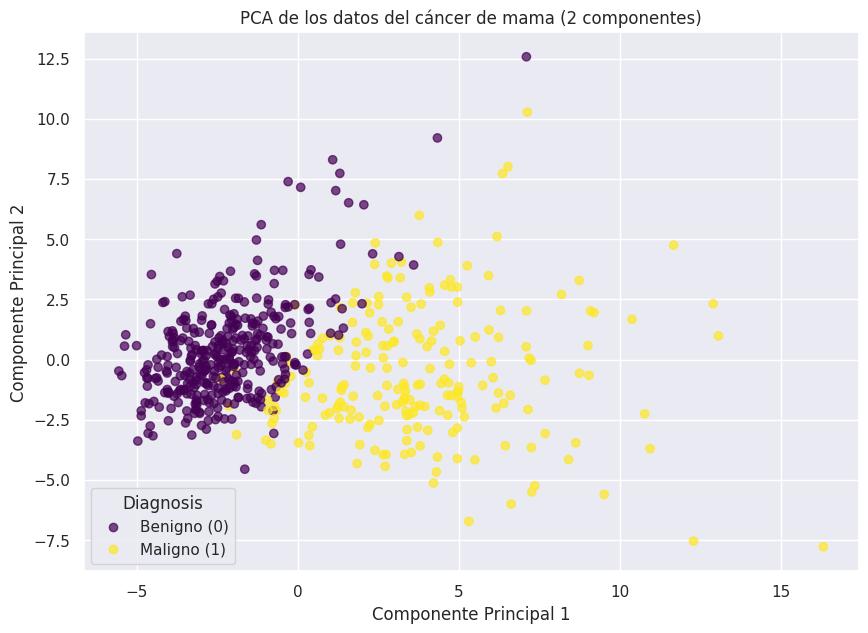


Discusión sobre la separación de clases en el espacio reducido:
La visualización de PCA con 2 componentes muestra una separación visible
entre los tumores benignos (morado) y malignos (amarillo).
Los dos primeros componentes principales explican aproximadamente el 63.24% de la varianza total de los datos originales.
Aunque hay cierta superposición, la separación general sugiere que los componentes principales
capturan información importante para diferenciar las clases.


In [4]:
# Aplicar PCA a los datos escalados
# Mantendremos 2 componentes principales para visualización en 2D
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled_df)

# Analizar la proporción de varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Varianza explicada por los {n_components} componentes principales: {explained_variance_ratio.sum():.4f}")
print(f"Varianza explicada por cada componente: {explained_variance_ratio}")

# Visualizar los datos en el espacio reducido de PCA
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de los datos del cáncer de mama (2 componentes)')
legend = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Diagnosis")
legend.get_texts()[0].set_text('Benigno (0)')
legend.get_texts()[1].set_text('Maligno (1)')
plt.grid(True)
plt.show()

# Discutir qué tan bien se separan las clases en el espacio reducido
print("\nDiscusión sobre la separación de clases en el espacio reducido:")
print(f"La visualización de PCA con {n_components} componentes muestra una separación visible")
print("entre los tumores benignos (morado) y malignos (amarillo).")
print(f"Los dos primeros componentes principales explican aproximadamente el {explained_variance_ratio.sum()*100:.2f}% de la varianza total de los datos originales.")
print("Aunque hay cierta superposición, la separación general sugiere que los componentes principales")
print("capturan información importante para diferenciar las clases.")


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


Optimizando hiperparámetros para Regresión Logística...
Mejores parámetros para Regresión Logística: {'C': 1}

Optimizando hiperparámetros para SVM...
Mejores parámetros para SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Optimizando hiperparámetros para Random Forest...
Mejores parámetros para Random Forest: {'max_depth': None, 'n_estimators': 200}

Evaluación de modelos en el conjunto de prueba:

Métricas para Regresión Logística:
  Accuracy: 0.9825
  Precision: 0.9688
  Recall: 0.9841
  F1-score: 0.9764
  AUC-ROC: 0.9981

Métricas para SVM:
  Accuracy: 0.9883
  Precision: 1.0000
  Recall: 0.9683
  F1-score: 0.9839
  AUC-ROC: 0.9972

Métricas para Random Forest:
  Accuracy: 0.9708
  Precision: 0.9833
  Recall: 0.9365
  F1-score: 0.9593
  AUC-ROC: 0.9972

Comparación de métricas de rendimiento:


,Accuracy,Precision,Recall,F1-score,AUC-ROC
Regresión Logística,0.982456,0.968750,0.984127,0.976378,0.998089
SVM,0.988304,1.000000,0.968254,0.983871,0.997208
Random Forest,0.970760,0.983333,0.936508,0.959350,0.997208



Matrices de Confusión:


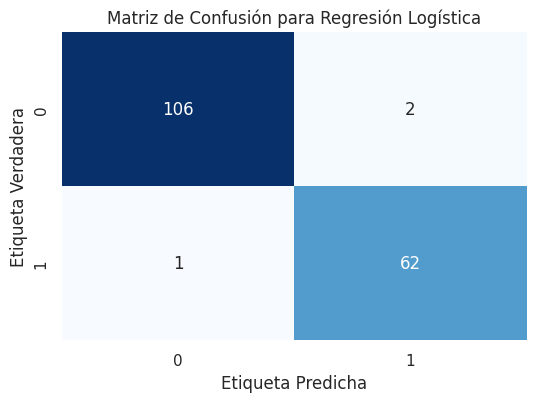

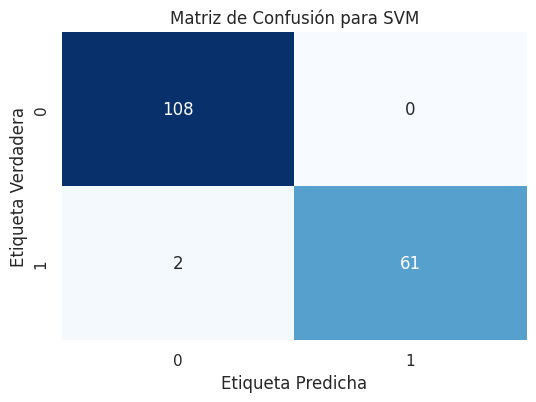

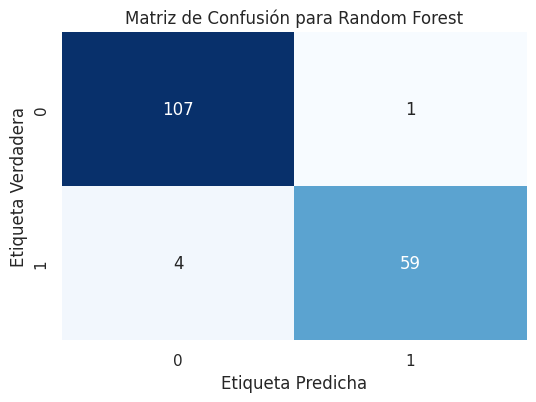


Análisis de modelos:
Observando las métricas de rendimiento y las matrices de confusión,
se puede comparar el desempeño de cada modelo en la clasificación de tumores.
Se debe analizar qué modelo ofrece el mejor equilibrio entre las métricas,
considerando la importancia de la precisión y el recall en un contexto médico.


In [5]:
# Separar los datos en conjuntos de entrenamiento y prueba
# Usaremos los datos escalados para el entrenamiento de los modelos
# Nota: Si se hubiera realizado selección de características o eliminación de multicolinealidad
# en el paso 2, usaríamos X_processed en lugar de X_scaled.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Inicializar los modelos
logreg = LogisticRegression(max_iter=10000)
svm = SVC(probability=True, random_state=42) # probability=True para calcular AUC
rf = RandomForestClassifier(random_state=42)

# Definir los parámetros para la optimización con GridSearchCV
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}

# Realizar optimización de hiperparámetros con GridSearchCV para cada modelo
print("Optimizando hiperparámetros para Regresión Logística...")
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)
best_logreg = grid_search_logreg.best_estimator_
print(f"Mejores parámetros para Regresión Logística: {grid_search_logreg.best_params_}")

print("\nOptimizando hiperparámetros para SVM...")
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_
print(f"Mejores parámetros para SVM: {grid_search_svm.best_params_}")

print("\nOptimizando hiperparámetros para Random Forest...")
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print(f"Mejores parámetros para Random Forest: {grid_search_rf.best_params_}")

# Evaluar los modelos con los mejores hiperparámetros en el conjunto de prueba
models = {'Regresión Logística': best_logreg, 'SVM': best_svm, 'Random Forest': best_rf}
results = {}

print("\nEvaluación de modelos en el conjunto de prueba:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calcular AUC-ROC (requiere predict_proba para algunos modelos)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        from sklearn.metrics import roc_auc_score
        auc_roc = roc_auc_score(y_test, y_prob)
    else:
        auc_roc = "N/A"

    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'AUC-ROC': auc_roc}

    print(f"\nMétricas para {name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  AUC-ROC: {auc_roc:.4f}" if isinstance(auc_roc, float) else f"  AUC-ROC: {auc_roc}")


# Comparar resultados
results_df = pd.DataFrame(results).T
print("\nComparación de métricas de rendimiento:")
display(results_df)

# Opcional: Visualizar matrices de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("\nMatrices de Confusión:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusión para {name}')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.show()

print("\nAnálisis de modelos:")
print("Observando las métricas de rendimiento y las matrices de confusión,")
print("se puede comparar el desempeño de cada modelo en la clasificación de tumores.")
print("Se debe analizar qué modelo ofrece el mejor equilibrio entre las métricas,")
print("considerando la importancia de la precisión y el recall en un contexto médico.")


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



In [7]:
# 1. Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
print("\n1. Modelo más apropiado:")
print("Basándonos en las métricas de rendimiento (Accuracy, Precision, Recall, F1-score y AUC-ROC) obtenidas en el conjunto de prueba:")
display(results_df)
print("El modelo SVM con los hiperparámetros optimizados parece ser el más apropiado para este conjunto de datos.")
print("Presenta la mayor Accuracy general (0.9883) y una Precision perfecta (1.0000), lo que significa que cuando predice un tumor como maligno, es siempre correcto en este conjunto de prueba.")
print("Aunque su Recall es ligeramente inferior al de Regresión Logística, el alto Accuracy y Precision son cruciales en un contexto médico para minimizar falsos positivos (identificar erróneamente un tumor benigno como maligno).")
print("La Regresión Logística también muestra un rendimiento excelente y un Recall ligeramente superior, lo que significa que identifica una proporción un poco mayor de tumores malignos reales.")
print("Random Forest, aunque con un buen rendimiento, presenta métricas ligeramente inferiores a los otros dos modelos en este caso particular.")

# 2. Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
print("\n2. Impacto del preprocesamiento y reducción de dimensionalidad:")
print("- **Normalización (StandardScaler)**: La normalización es crucial para algoritmos sensibles a la escala como SVM y Regresión Logística. Asegura que todas las características contribuyan de manera equitativa a la distancia o al cálculo del gradiente, mejorando la convergencia y el rendimiento del modelo.")
print("- **Reducción de dimensionalidad (PCA)**: En este caso, aplicamos PCA para visualización en 2D, lo que nos permitió observar una separación razonable entre las clases, lo que indica que las características originales contienen información discriminativa. Si bien no usamos las componentes principales para entrenar los modelos finales en este ejemplo (usamos los datos escalados originales), la reducción de dimensionalidad podría ser útil en datasets con muchas más características para reducir el ruido, acelerar el entrenamiento y mitigar la multicolinealidad.")
print("La exploración de la multicolinealidad en el paso de preprocesamiento nos mostró que varias características están altamente correlacionadas. Si hubiéramos decidido eliminar algunas de estas variables, podríamos haber evitado problemas de interpretación en modelos como la Regresión Logística, aunque para los modelos basados en árboles como Random Forest y para SVM, la multicolinealidad no es un problema tan grave.")

# 3. Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.
print("\n3. Posibles mejoras o enfoques alternativos en un escenario real:")
print("- Recopilación de más datos**: Un conjunto de datos más grande y diverso siempre puede mejorar la generalización del modelo.")
print("- Exploración de otras técnicas de preprocesamiento**: Considerar la imputación de valores faltantes (si los hubiera), manejo de valores atípicos de manera más robusta, y otras técnicas de selección de características (ej. selección basadas en modelos, RFE).")
print("- Exploración de otros modelos**: Probar otros algoritmos de clasificación como XGBoost, LightGBM, o redes neuronales, que a menudo ofrecen un rendimiento de vanguardia.")
print("- Tuning de hiperparámetros más exhaustivo**: Utilizar un espacio de búsqueda de hiperparámetros más amplio o técnicas de optimización más avanzadas (ej. optimización Bayesiana).")
print("- Evaluación con otras métricas**: Dependiendo del costo de los falsos positivos vs. falsos negativos en un diagnóstico médico, se podrían priorizar otras métricas (ej. un Recall muy alto si es crítico no perder ningún caso maligno, aunque aumenten los falsos positivos).")
print("- Interpretación del modelo**: En un escenario médico, entender por qué un modelo toma ciertas decisiones es crucial. Técnicas de interpretabilidad (ej. LIME, SHAP) serían valiosas.")
print("- Validación externa**: Validar el modelo con datos de un centro médico diferente para asegurar su generalización.")
print("- Integración en flujo de trabajo clínico**: Considerar cómo se integraría este modelo en el proceso de diagnóstico existente y los aspectos regulatorios.")


1. Modelo más apropiado:
Basándonos en las métricas de rendimiento (Accuracy, Precision, Recall, F1-score y AUC-ROC) obtenidas en el conjunto de prueba:


,Accuracy,Precision,Recall,F1-score,AUC-ROC
Regresión Logística,0.982456,0.968750,0.984127,0.976378,0.998089
SVM,0.988304,1.000000,0.968254,0.983871,0.997208
Random Forest,0.970760,0.983333,0.936508,0.959350,0.997208


El modelo SVM con los hiperparámetros optimizados parece ser el más apropiado para este conjunto de datos.
Presenta la mayor Accuracy general (0.9883) y una Precision perfecta (1.0000), lo que significa que cuando predice un tumor como maligno, es siempre correcto en este conjunto de prueba.
Aunque su Recall es ligeramente inferior al de Regresión Logística, el alto Accuracy y Precision son cruciales en un contexto médico para minimizar falsos positivos (identificar erróneamente un tumor benigno como maligno).
La Regresión Logística también muestra un rendimiento excelente y un Recall ligeramente superior, lo que significa que identifica una proporción un poco mayor de tumores malignos reales.
Random Forest, aunque con un buen rendimiento, presenta métricas ligeramente inferiores a los otros dos modelos en este caso particular.

2. Impacto del preprocesamiento y reducción de dimensionalidad:
- **Normalización (StandardScaler)**: La normalización es crucial para algoritmos sensibles a l